In [1]:
cd /content/drive/MyDrive/NCC/src/

/content/drive/MyDrive/NCC/src


In [3]:
ls -l

total 828216
-rw------- 1 root root       792 Dec 24  2022 config.py
-rw------- 1 root root 846245556 Nov 13 18:42 dataset_padded_cutted.hdf5
-rw------- 1 root root      1175 Dec 26  2022 data_transform.py
-rw------- 1 root root       265 Dec 19  2022 knotify_query.py
-rw------- 1 root root      3053 Oct 26 14:30 ncc_DataCreator.py
-rw------- 1 root root      6241 Nov 13 20:43 NCC_Models.py
-rw------- 1 root root       701 Dec 26  2022 ncc.py
-rw------- 1 root root      3639 Nov 15 12:10 NCC_Train.py
-rw------- 1 root root   1816848 Nov 15 12:13 Prediction.h5
drwx------ 2 root root      4096 Nov 15 13:57 __pycache__/
-rw------- 1 root root      3914 Dec 26  2022 rfam_query.py
drwx------ 2 root root      4096 Nov  9 15:18 Tenth_Fold_New_Model_500_8/


In [2]:
import importlib
import NCC_Train
import matplotlib.pyplot as plt
from sklearn import metrics

X_train = (35427, 500, 8) , Y_train = (35427, 13)
X_test = (17450, 500, 8) , Y_test = (17450, 13)


In [ ]:
importlib.reload(NCC_Train)
history = NCC_Train.train()

X_train = (35427, 500, 8) , Y_train = (35427, 13)
X_test = (17450, 500, 8) , Y_test = (17450, 13)
1. MODEL COMPILE
2. MODEL SUMMARY
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 500, 8)]          0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 500, 512)          408576    
 onal)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 256000)            0         
                                                                 
 dense_32 (Dense)            (None, 256)               65536256  
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                           

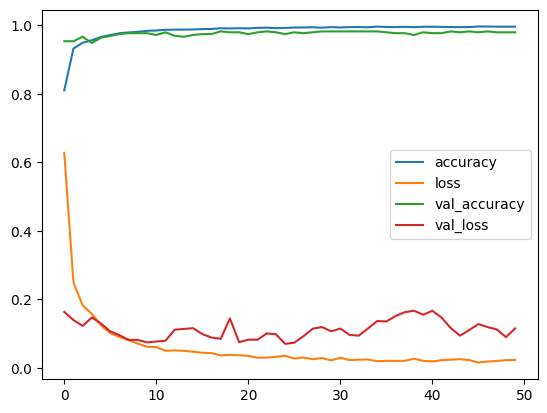

In [ ]:
plt.plot(history.history['accuracy']      ,label = 'accuracy')
plt.plot(history.history['loss']          ,label = 'loss')
plt.plot(history.history['val_accuracy']  ,label = 'val_accuracy')
plt.plot(history.history['val_loss']      ,label = 'val_loss')
plt.legend()
plt.show()


In [5]:
importlib.reload(NCC_Train)
Y_pred,Y_true = NCC_Train.test()


X_train = (35427, 500, 8) , Y_train = (35427, 13)
X_test = (17450, 500, 8) , Y_test = (17450, 13)
546/546 [==============================] - 9s 16ms/step


In [10]:
print("Shape of Y_pred = "+str(Y_pred.shape))
print("Shape of Y_true = "+str(Y_true.shape))

Shape of Y_pred = (17450, 13)
Shape of Y_true = (17450, 13)


In [32]:
# confusion_matrix = metrics.confusion_matrix(y_true=Y_true, y_pred=Y_pred)
# Class label dictionary Reversed
# --------------------------------------
class_dict = {
    0       :   '5S_rRNA'    ,
    1       :   '5_8S_rRNA'  ,
    2       :   'tRNA'       ,
    3       :   'ribozyme'   ,
    4       :   'CD-box'     ,
    5       :   'miRNA'      ,
    6       :   'Intron_gpI' ,
    7       :   'Intron_gpII',
    8       :   'HACA-box'   ,
    9       :   'riboswitch' ,
    10      :   'IRES'       ,
    11      :   'leader'     ,
    12      :   'scaRNA'
}

Y_true_class = []
Y_pred_class = []

for class_array in Y_true:
  for i in range(len(class_array)):
    if class_array[i] == 1:
      Y_true_class.append(class_dict[i])


for class_array in Y_pred:
  index: int = 0
  max:float = 0.0
  for i in range(0,len(class_array)):
    element = class_array[i]
    float_element = float(element)
    if float_element > max:
      max = float_element
      index = i
  Y_pred_class.append(class_dict[index])



print(Y_true_class)
print(Y_pred_class)

['CD-box', 'ribozyme', 'IRES', '5_8S_rRNA', 'scaRNA', 'CD-box', 'miRNA', 'riboswitch', '5_8S_rRNA', 'Intron_gpII', 'tRNA', 'Intron_gpII', 'miRNA', 'miRNA', 'ribozyme', '5S_rRNA', '5S_rRNA', 'ribozyme', 'IRES', '5_8S_rRNA', '5S_rRNA', 'riboswitch', 'ribozyme', 'scaRNA', 'leader', 'Intron_gpII', 'ribozyme', 'IRES', 'Intron_gpII', '5_8S_rRNA', 'CD-box', 'riboswitch', 'miRNA', 'CD-box', 'leader', 'leader', 'CD-box', 'HACA-box', '5_8S_rRNA', 'riboswitch', 'HACA-box', 'scaRNA', 'tRNA', 'ribozyme', 'Intron_gpI', 'riboswitch', 'scaRNA', 'Intron_gpII', 'tRNA', 'leader', 'ribozyme', 'miRNA', 'riboswitch', '5S_rRNA', '5S_rRNA', 'ribozyme', '5_8S_rRNA', 'IRES', 'HACA-box', 'CD-box', 'HACA-box', 'HACA-box', 'CD-box', '5S_rRNA', 'scaRNA', 'tRNA', 'tRNA', 'HACA-box', '5S_rRNA', 'riboswitch', 'scaRNA', '5S_rRNA', 'CD-box', 'HACA-box', 'IRES', 'miRNA', 'CD-box', 'ribozyme', 'miRNA', '5S_rRNA', 'HACA-box', 'IRES', 'ribozyme', 'ribozyme', 'leader', 'riboswitch', '5_8S_rRNA', 'CD-box', 'miRNA', 'miRNA', '

In [43]:
count = 0
for i in range(0, len(Y_true_class)):
  if Y_true_class[i] != Y_pred_class[i]:
    count+=1
print(count)
print("Test Accuracy = "+str(100 - 100*(count/len(Y_true_class))) + "%")

271
Test Accuracy = 98.44699140401146%


In [34]:
print("Shape of Y_true_class = "+str(len(Y_true_class)))
print("Shape of Y_pred_class = "+str(len(Y_pred_class)))

Shape of Y_true_class = 17450
Shape of Y_pred_class = 17450


In [35]:
confusion_matrix = metrics.confusion_matrix(Y_true_class, Y_pred_class)

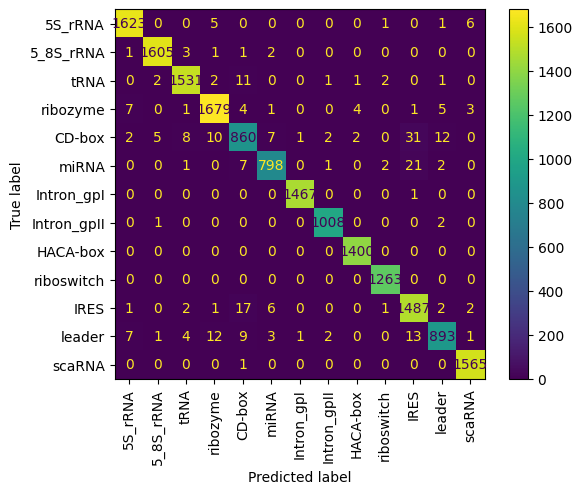

In [39]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [
                                                '5S_rRNA'    ,
                                                '5_8S_rRNA'  ,
                                                'tRNA'       ,
                                                'ribozyme'   ,
                                                'CD-box'     ,
                                                'miRNA'      ,
                                                'Intron_gpI' ,
                                                'Intron_gpII',
                                                'HACA-box'   ,
                                                'riboswitch' ,
                                                'IRES'       ,
                                                'leader'     ,
                                                'scaRNA'])

cm_display.plot()
plt.xticks(rotation=90)
plt.show()